In [10]:
import torch
import seaborn as sns
import numpy as np
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

Processing images:   0%|          | 0/350 [00:14<?, ?it/s]


cuda


In [11]:
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

In [12]:
model = torchvision.models.alexnet(weights="IMAGENET1K_V1")
transform=torchvision.models.ConvNeXt_Tiny_Weights.IMAGENET1K_V1.transforms()

In [13]:
print(model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [14]:
from PIL import Image
import os
print(os.getcwd())

/gpfs/home/nhansen3/DrivingSimProj


In [15]:
image_path = "DAVID-sim/m1596437/Images/Video_000/v000_0000.png"  
img_var = Image.open(image_path)
np.asarray(img_var).shape

(600, 800, 3)

In [16]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [22]:
test_folder = "DAVID-sim/m1596437/Labels/Video_009" 

In [30]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
PEDESTRIAN_COLOR = (220, 20, 60)

def count_pedestrian_pixels(image_path, pedestrian_color=PEDESTRIAN_COLOR):
    
    image = cv2.imread(image_path)  
    if image is None:
        print(f"Error loading {image_path}")
        return 0
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    mask = (image[:, :, 0] == pedestrian_color[0]) & \
           (image[:, :, 1] == pedestrian_color[1]) & \
           (image[:, :, 2] == pedestrian_color[2])
    
    return np.sum(mask)

#risk thresholds are still made up and not real !!!
def classify_risk(pixel_count):
    if pixel_count > 2000:  
        return "High"
    elif 1000 <= pixel_count <= 2000:
        return "Medium"
    else:
        return "Low"

In [32]:
image_files = [f for f in os.listdir(test_folder) if f.endswith((".png", ".jpg", ".jpeg"))]

data_list = []

for image_file in image_files[:1000]: 
    image_path = os.path.join(test_folder, image_file)
    pixel_count = count_pedestrian_pixels(image_path)
    risk_level = classify_risk(pixel_count)
    
    data_list.append({"image": image_file, "pedestrian_pixels": pixel_count, "risk_level": risk_level})
    
df = pd.DataFrame(data_list)
print(df.head(), len(df))

           image  pedestrian_pixels risk_level
0  v009_0011.png                216        Low
1  v009_0143.png                179        Low
2  v009_0174.png                200        Low
3  v009_0256.png                338        Low
4  v009_0113.png                221        Low 364


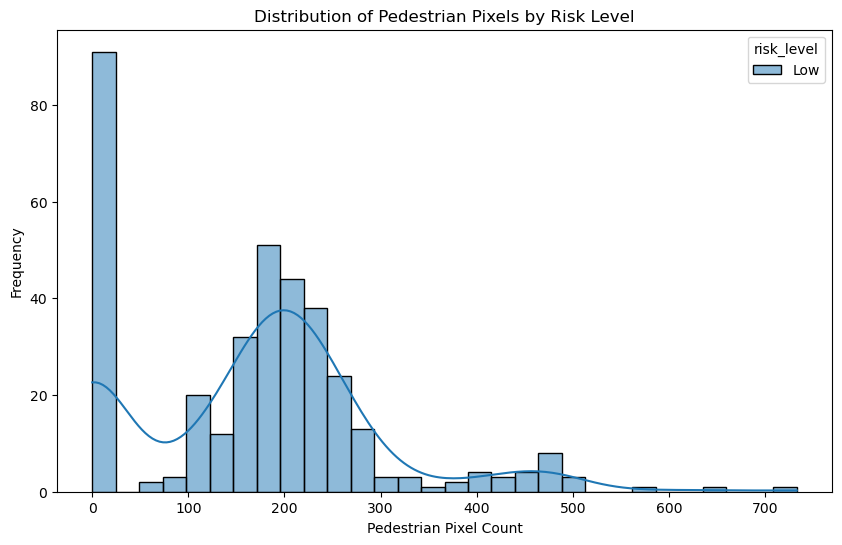

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x="pedestrian_pixels", hue="risk_level", bins=30, kde=True)
plt.xlabel("Pedestrian Pixel Count")
plt.ylabel("Frequency")
plt.title("Distribution of Pedestrian Pixels by Risk Level")
plt.show()

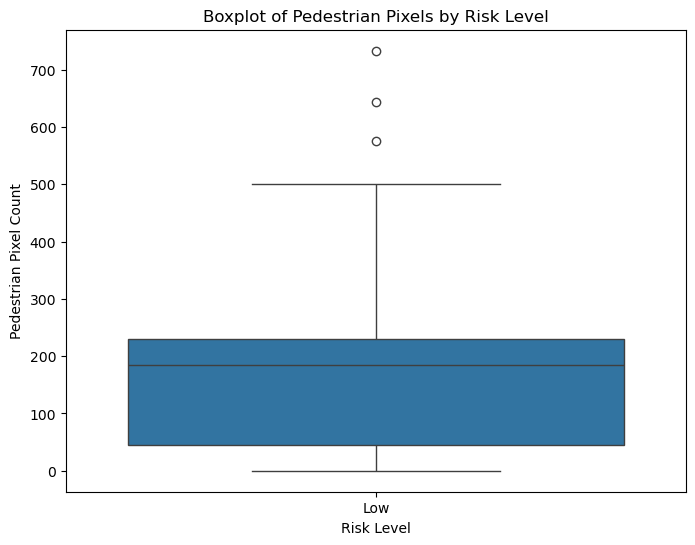

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="risk_level", y="pedestrian_pixels")
plt.xlabel("Risk Level")
plt.ylabel("Pedestrian Pixel Count")
plt.title("Boxplot of Pedestrian Pixels by Risk Level")
plt.show()

In [55]:
import os
import pandas as pd
from pathlib import Path
from tqdm import tqdm

PEDESTRIAN_COLOR = (220, 20, 60)

def count_pedestrian_pixels(image_path, pedestrian_color=PEDESTRIAN_COLOR):
    """Counts the number of pedestrian pixels in an image."""
    image = cv2.imread(str(image_path))
    if image is None:
        print(f"Error loading {image_path}")
        return 0
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    mask = (image[:, :, 0] == pedestrian_color[0]) & \
           (image[:, :, 1] == pedestrian_color[1]) & \
           (image[:, :, 2] == pedestrian_color[2])
    return int(np.sum(mask))  # Ensure integer output

def classify_risk(pixel_count):
    """Classifies pedestrian risk based on pixel count."""
    if pixel_count > 1000:
        return "High"
    elif 250 <= pixel_count <= 1000:
        return "Medium"
    else:
        return "Low"

# List of folders to process
test_folders = [
    "DAVID-sim/m1596437/Labels/Video_001",
    "DAVID-sim/m1596437/Labels/Video_002",
    "DAVID-sim/m1596437/Labels/Video_003",
    "DAVID-sim/m1596437/Labels/Video_004",
    "DAVID-sim/m1596437/Labels/Video_005",
    "DAVID-sim/m1596437/Labels/Video_006",
    "DAVID-sim/m1596437/Labels/Video_007",
    "DAVID-sim/m1596437/Labels/Video_008",
    "DAVID-sim/m1596437/Labels/Video_009",
    "DAVID-sim/m1596437/Labels/Video_010",
    "DAVID-sim/m1596437/Labels/Video_011",
    "DAVID-sim/m1596437/Labels/Video_012",
    "DAVID-sim/m1596437/Labels/Video_013",
    "DAVID-sim/m1596437/Labels/Video_014",
    "DAVID-sim/m1596437/Labels/Video_015",
    "DAVID-sim/m1596437/Labels/Video_016",
    "DAVID-sim/m1596437/Labels/Video_017",
    "DAVID-sim/m1596437/Labels/Video_018",
    "DAVID-sim/m1596437/Labels/Video_019",
    "DAVID-sim/m1596437/Labels/Video_020",
    "DAVID-sim/m1596437/Labels/Video_021",
    "DAVID-sim/m1596437/Labels/Video_022",
    "DAVID-sim/m1596437/Labels/Video_023",
    "DAVID-sim/m1596437/Labels/Video_024",
    "DAVID-sim/m1596437/Labels/Video_025",
    "DAVID-sim/m1596437/Labels/Video_026",
    "DAVID-sim/m1596437/Labels/Video_027"
]

# Collect data from all folders
data_list = []

for folder in test_folders:
    folder_path = Path(folder)
    
    if not folder_path.exists():
        print(f"Warning: Folder {folder} does not exist. Skipping...")
        continue  # Skip non-existing folders
    
    # Get all images in the folder
    image_files = list(folder_path.glob("*.png")) + \
                  list(folder_path.glob("*.jpg")) + \
                  list(folder_path.glob("*.jpeg"))

    if not image_files:
        print(f"Warning: No images found in {folder}. Skipping...")
        continue

    print(f"Processing {len(image_files)} images in {folder}...")

    # Process images in this folder
    for image_path in tqdm(image_files[:1000], desc=f"Processing {folder}"):
        pixel_count = count_pedestrian_pixels(str(image_path))
        risk_level = classify_risk(pixel_count)

        data_list.append({
            "folder": folder,
            "image": image_path.name,
            "pedestrian_pixels": pixel_count,
            "risk_level": risk_level
        })

# Convert to DataFrame
df = pd.DataFrame(data_list)

# Display results
print(df.head(), len(df))


Processing 342 images in DAVID-sim/m1596437/Labels/Video_001...


Processing DAVID-sim/m1596437/Labels/Video_001: 100%|██████████| 342/342 [00:01<00:00, 182.90it/s]


Processing 363 images in DAVID-sim/m1596437/Labels/Video_002...


Processing DAVID-sim/m1596437/Labels/Video_002: 100%|██████████| 363/363 [00:02<00:00, 179.25it/s]


Processing 350 images in DAVID-sim/m1596437/Labels/Video_003...


Processing DAVID-sim/m1596437/Labels/Video_003: 100%|██████████| 350/350 [00:01<00:00, 183.59it/s]


Processing 335 images in DAVID-sim/m1596437/Labels/Video_004...


Processing DAVID-sim/m1596437/Labels/Video_004: 100%|██████████| 335/335 [00:01<00:00, 180.50it/s]


Processing 390 images in DAVID-sim/m1596437/Labels/Video_005...


Processing DAVID-sim/m1596437/Labels/Video_005: 100%|██████████| 390/390 [00:02<00:00, 174.29it/s]


Processing 397 images in DAVID-sim/m1596437/Labels/Video_006...


Processing DAVID-sim/m1596437/Labels/Video_006: 100%|██████████| 397/397 [00:02<00:00, 172.59it/s]


Processing 443 images in DAVID-sim/m1596437/Labels/Video_007...


Processing DAVID-sim/m1596437/Labels/Video_007: 100%|██████████| 443/443 [00:02<00:00, 176.09it/s]


Processing 393 images in DAVID-sim/m1596437/Labels/Video_008...


Processing DAVID-sim/m1596437/Labels/Video_008: 100%|██████████| 393/393 [00:02<00:00, 185.07it/s]


Processing 364 images in DAVID-sim/m1596437/Labels/Video_009...


Processing DAVID-sim/m1596437/Labels/Video_009: 100%|██████████| 364/364 [00:01<00:00, 182.44it/s]


Processing 438 images in DAVID-sim/m1596437/Labels/Video_010...


Processing DAVID-sim/m1596437/Labels/Video_010: 100%|██████████| 438/438 [00:02<00:00, 189.63it/s]


Processing 346 images in DAVID-sim/m1596437/Labels/Video_011...


Processing DAVID-sim/m1596437/Labels/Video_011: 100%|██████████| 346/346 [00:01<00:00, 180.69it/s]


Processing 380 images in DAVID-sim/m1596437/Labels/Video_012...


Processing DAVID-sim/m1596437/Labels/Video_012: 100%|██████████| 380/380 [00:02<00:00, 178.72it/s]


Processing 325 images in DAVID-sim/m1596437/Labels/Video_013...


Processing DAVID-sim/m1596437/Labels/Video_013: 100%|██████████| 325/325 [00:01<00:00, 183.33it/s]


Processing 357 images in DAVID-sim/m1596437/Labels/Video_014...


Processing DAVID-sim/m1596437/Labels/Video_014: 100%|██████████| 357/357 [00:02<00:00, 176.47it/s]


Processing 384 images in DAVID-sim/m1596437/Labels/Video_015...


Processing DAVID-sim/m1596437/Labels/Video_015: 100%|██████████| 384/384 [00:02<00:00, 181.06it/s]


Processing 350 images in DAVID-sim/m1596437/Labels/Video_016...


Processing DAVID-sim/m1596437/Labels/Video_016: 100%|██████████| 350/350 [00:01<00:00, 180.19it/s]


Processing 360 images in DAVID-sim/m1596437/Labels/Video_017...


Processing DAVID-sim/m1596437/Labels/Video_017: 100%|██████████| 360/360 [00:01<00:00, 181.14it/s]


Processing 374 images in DAVID-sim/m1596437/Labels/Video_018...


Processing DAVID-sim/m1596437/Labels/Video_018: 100%|██████████| 374/374 [00:02<00:00, 177.79it/s]


Processing 431 images in DAVID-sim/m1596437/Labels/Video_019...


Processing DAVID-sim/m1596437/Labels/Video_019: 100%|██████████| 431/431 [00:02<00:00, 182.62it/s]


Processing 366 images in DAVID-sim/m1596437/Labels/Video_020...


Processing DAVID-sim/m1596437/Labels/Video_020: 100%|██████████| 366/366 [00:01<00:00, 183.47it/s]


Processing 448 images in DAVID-sim/m1596437/Labels/Video_021...


Processing DAVID-sim/m1596437/Labels/Video_021: 100%|██████████| 448/448 [00:02<00:00, 171.54it/s]


Processing 351 images in DAVID-sim/m1596437/Labels/Video_022...


Processing DAVID-sim/m1596437/Labels/Video_022: 100%|██████████| 351/351 [00:02<00:00, 175.39it/s]


Processing 451 images in DAVID-sim/m1596437/Labels/Video_023...


Processing DAVID-sim/m1596437/Labels/Video_023: 100%|██████████| 451/451 [00:02<00:00, 182.74it/s]


Processing 443 images in DAVID-sim/m1596437/Labels/Video_024...


Processing DAVID-sim/m1596437/Labels/Video_024: 100%|██████████| 443/443 [00:02<00:00, 180.25it/s]


Processing 438 images in DAVID-sim/m1596437/Labels/Video_025...


Processing DAVID-sim/m1596437/Labels/Video_025: 100%|██████████| 438/438 [00:02<00:00, 178.61it/s]


Processing 386 images in DAVID-sim/m1596437/Labels/Video_026...


Processing DAVID-sim/m1596437/Labels/Video_026: 100%|██████████| 386/386 [00:02<00:00, 170.59it/s]


Processing 457 images in DAVID-sim/m1596437/Labels/Video_027...


Processing DAVID-sim/m1596437/Labels/Video_027: 100%|██████████| 457/457 [00:02<00:00, 178.70it/s]

                                folder          image  pedestrian_pixels  \
0  DAVID-sim/m1596437/Labels/Video_001  v001_0341.png               3358   
1  DAVID-sim/m1596437/Labels/Video_001  v001_0036.png                355   
2  DAVID-sim/m1596437/Labels/Video_001  v001_0000.png                418   
3  DAVID-sim/m1596437/Labels/Video_001  v001_0270.png               2761   
4  DAVID-sim/m1596437/Labels/Video_001  v001_0283.png               3224   

  risk_level  
0       High  
1     Medium  
2     Medium  
3       High  
4       High   10462


In [58]:
import os
import pandas as pd
from pathlib import Path
from tqdm import tqdm

PEDESTRIAN_COLOR = (220, 20, 60)

def count_pedestrian_pixels(image_path, pedestrian_color=PEDESTRIAN_COLOR):
    """Counts the number of pedestrian pixels in an image."""
    image = cv2.imread(str(image_path))
    if image is None:
        print(f"Error loading {image_path}")
        return 0
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    mask = (image[:, :, 0] == pedestrian_color[0]) & \
           (image[:, :, 1] == pedestrian_color[1]) & \
           (image[:, :, 2] == pedestrian_color[2])
    return int(np.sum(mask))  # Ensure integer output

def classify_risk(pixel_count):
    """Classifies pedestrian risk based on pixel count."""
    if pixel_count > 5000:
        return "High"
    elif 1000 <= pixel_count <= 5000:
        return "Medium"
    else:
        return "Low"

# List of folders to process
test_folders = [
    "DAVID-sim/m1596437/Labels/Video_001",
    "DAVID-sim/m1596437/Labels/Video_002",
    "DAVID-sim/m1596437/Labels/Video_003",
    "DAVID-sim/m1596437/Labels/Video_004",
    "DAVID-sim/m1596437/Labels/Video_005",
    "DAVID-sim/m1596437/Labels/Video_006",
    "DAVID-sim/m1596437/Labels/Video_007",
    "DAVID-sim/m1596437/Labels/Video_008",
    "DAVID-sim/m1596437/Labels/Video_009",
    "DAVID-sim/m1596437/Labels/Video_010",
    "DAVID-sim/m1596437/Labels/Video_011",
    "DAVID-sim/m1596437/Labels/Video_012",
    "DAVID-sim/m1596437/Labels/Video_013",
    "DAVID-sim/m1596437/Labels/Video_014",
    "DAVID-sim/m1596437/Labels/Video_015",
    "DAVID-sim/m1596437/Labels/Video_016",
    "DAVID-sim/m1596437/Labels/Video_017",
    "DAVID-sim/m1596437/Labels/Video_018",
    "DAVID-sim/m1596437/Labels/Video_019",
    "DAVID-sim/m1596437/Labels/Video_020",
    "DAVID-sim/m1596437/Labels/Video_021",
    "DAVID-sim/m1596437/Labels/Video_022",
    "DAVID-sim/m1596437/Labels/Video_023",
    "DAVID-sim/m1596437/Labels/Video_024",
    "DAVID-sim/m1596437/Labels/Video_025",
    "DAVID-sim/m1596437/Labels/Video_026",
    "DAVID-sim/m1596437/Labels/Video_027"
]

# Collect data from all folders
data_list = []

for folder in test_folders:
    folder_path = Path(folder)
    
    if not folder_path.exists():
        print(f"Warning: Folder {folder} does not exist. Skipping...")
        continue  # Skip non-existing folders
    
    # Get all images in the folder
    image_files = list(folder_path.glob("*.png")) + \
                  list(folder_path.glob("*.jpg")) + \
                  list(folder_path.glob("*.jpeg"))

    if not image_files:
        print(f"Warning: No images found in {folder}. Skipping...")
        continue

    print(f"Processing {len(image_files)} images in {folder}...")

    # Process images in this folder
    for image_path in tqdm(image_files[:1000], desc=f"Processing {folder}"):
        pixel_count = count_pedestrian_pixels(str(image_path))
        risk_level = classify_risk(pixel_count)

        # Add the full path to the data
        data_list.append({
            "folder": folder,
            "image": image_path.name,
            "image_path": str(image_path),  # Add full path
            "pedestrian_pixels": pixel_count,
            "risk_level": risk_level
        })

# Convert to DataFrame
df = pd.DataFrame(data_list)

# Save to CSV
df.to_csv("pedestrian_risk_analysis.csv", index=False)

# Display results
print(df.head(), len(df))

Processing 342 images in DAVID-sim/m1596437/Labels/Video_001...


Processing DAVID-sim/m1596437/Labels/Video_001: 100%|██████████| 342/342 [00:02<00:00, 153.99it/s]


Processing 363 images in DAVID-sim/m1596437/Labels/Video_002...


Processing DAVID-sim/m1596437/Labels/Video_002: 100%|██████████| 363/363 [00:02<00:00, 173.00it/s]


Processing 350 images in DAVID-sim/m1596437/Labels/Video_003...


Processing DAVID-sim/m1596437/Labels/Video_003: 100%|██████████| 350/350 [00:02<00:00, 174.07it/s]


Processing 335 images in DAVID-sim/m1596437/Labels/Video_004...


Processing DAVID-sim/m1596437/Labels/Video_004: 100%|██████████| 335/335 [00:02<00:00, 164.11it/s]


Processing 390 images in DAVID-sim/m1596437/Labels/Video_005...


Processing DAVID-sim/m1596437/Labels/Video_005: 100%|██████████| 390/390 [00:02<00:00, 172.69it/s]


Processing 397 images in DAVID-sim/m1596437/Labels/Video_006...


Processing DAVID-sim/m1596437/Labels/Video_006: 100%|██████████| 397/397 [00:02<00:00, 153.53it/s]


Processing 443 images in DAVID-sim/m1596437/Labels/Video_007...


Processing DAVID-sim/m1596437/Labels/Video_007: 100%|██████████| 443/443 [00:02<00:00, 161.86it/s]


Processing 393 images in DAVID-sim/m1596437/Labels/Video_008...


Processing DAVID-sim/m1596437/Labels/Video_008: 100%|██████████| 393/393 [00:02<00:00, 166.47it/s]


Processing 364 images in DAVID-sim/m1596437/Labels/Video_009...


Processing DAVID-sim/m1596437/Labels/Video_009: 100%|██████████| 364/364 [00:02<00:00, 169.19it/s]


Processing 438 images in DAVID-sim/m1596437/Labels/Video_010...


Processing DAVID-sim/m1596437/Labels/Video_010: 100%|██████████| 438/438 [00:02<00:00, 171.90it/s]


Processing 346 images in DAVID-sim/m1596437/Labels/Video_011...


Processing DAVID-sim/m1596437/Labels/Video_011: 100%|██████████| 346/346 [00:02<00:00, 148.68it/s]


Processing 380 images in DAVID-sim/m1596437/Labels/Video_012...


Processing DAVID-sim/m1596437/Labels/Video_012: 100%|██████████| 380/380 [00:02<00:00, 165.36it/s]


Processing 325 images in DAVID-sim/m1596437/Labels/Video_013...


Processing DAVID-sim/m1596437/Labels/Video_013: 100%|██████████| 325/325 [00:01<00:00, 170.29it/s]


Processing 357 images in DAVID-sim/m1596437/Labels/Video_014...


Processing DAVID-sim/m1596437/Labels/Video_014: 100%|██████████| 357/357 [00:02<00:00, 162.27it/s]


Processing 384 images in DAVID-sim/m1596437/Labels/Video_015...


Processing DAVID-sim/m1596437/Labels/Video_015: 100%|██████████| 384/384 [00:02<00:00, 154.05it/s]


Processing 350 images in DAVID-sim/m1596437/Labels/Video_016...


Processing DAVID-sim/m1596437/Labels/Video_016: 100%|██████████| 350/350 [00:02<00:00, 152.53it/s]


Processing 360 images in DAVID-sim/m1596437/Labels/Video_017...


Processing DAVID-sim/m1596437/Labels/Video_017: 100%|██████████| 360/360 [00:02<00:00, 174.33it/s]


Processing 374 images in DAVID-sim/m1596437/Labels/Video_018...


Processing DAVID-sim/m1596437/Labels/Video_018: 100%|██████████| 374/374 [00:02<00:00, 146.80it/s]


Processing 431 images in DAVID-sim/m1596437/Labels/Video_019...


Processing DAVID-sim/m1596437/Labels/Video_019: 100%|██████████| 431/431 [00:02<00:00, 163.49it/s]


Processing 366 images in DAVID-sim/m1596437/Labels/Video_020...


Processing DAVID-sim/m1596437/Labels/Video_020: 100%|██████████| 366/366 [00:02<00:00, 159.32it/s]


Processing 448 images in DAVID-sim/m1596437/Labels/Video_021...


Processing DAVID-sim/m1596437/Labels/Video_021: 100%|██████████| 448/448 [00:03<00:00, 147.98it/s]


Processing 351 images in DAVID-sim/m1596437/Labels/Video_022...


Processing DAVID-sim/m1596437/Labels/Video_022: 100%|██████████| 351/351 [00:02<00:00, 152.59it/s]


Processing 451 images in DAVID-sim/m1596437/Labels/Video_023...


Processing DAVID-sim/m1596437/Labels/Video_023: 100%|██████████| 451/451 [00:02<00:00, 158.41it/s]


Processing 443 images in DAVID-sim/m1596437/Labels/Video_024...


Processing DAVID-sim/m1596437/Labels/Video_024: 100%|██████████| 443/443 [00:02<00:00, 154.10it/s]


Processing 438 images in DAVID-sim/m1596437/Labels/Video_025...


Processing DAVID-sim/m1596437/Labels/Video_025: 100%|██████████| 438/438 [00:03<00:00, 145.85it/s]


Processing 386 images in DAVID-sim/m1596437/Labels/Video_026...


Processing DAVID-sim/m1596437/Labels/Video_026: 100%|██████████| 386/386 [00:02<00:00, 138.52it/s]


Processing 457 images in DAVID-sim/m1596437/Labels/Video_027...


Processing DAVID-sim/m1596437/Labels/Video_027: 100%|██████████| 457/457 [00:03<00:00, 140.52it/s]


                                folder          image  \
0  DAVID-sim/m1596437/Labels/Video_001  v001_0341.png   
1  DAVID-sim/m1596437/Labels/Video_001  v001_0036.png   
2  DAVID-sim/m1596437/Labels/Video_001  v001_0000.png   
3  DAVID-sim/m1596437/Labels/Video_001  v001_0270.png   
4  DAVID-sim/m1596437/Labels/Video_001  v001_0283.png   

                                          image_path  pedestrian_pixels  \
0  DAVID-sim/m1596437/Labels/Video_001/v001_0341.png               3358   
1  DAVID-sim/m1596437/Labels/Video_001/v001_0036.png                355   
2  DAVID-sim/m1596437/Labels/Video_001/v001_0000.png                418   
3  DAVID-sim/m1596437/Labels/Video_001/v001_0270.png               2761   
4  DAVID-sim/m1596437/Labels/Video_001/v001_0283.png               3224   

  risk_level  
0     Medium  
1        Low  
2        Low  
3     Medium  
4     Medium   10462


In [61]:
file_path = "pedestrian_risk_analysis.csv"
absolute_path = os.path.abspath(file_path)
print(absolute_path)

/gpfs/home/nhansen3/DrivingSimProj/pedestrian_risk_analysis.csv


In [60]:
df.head()

,folder,image,image_path,pedestrian_pixels,risk_level
0,DAVID-sim/m1596437/Labels/Video_001,v001_0341.png,DAVID-sim/m1596437/Labels/Video_001/v001_0341.png,3358,Medium
1,DAVID-sim/m1596437/Labels/Video_001,v001_0036.png,DAVID-sim/m1596437/Labels/Video_001/v001_0036.png,355,Low
2,DAVID-sim/m1596437/Labels/Video_001,v001_0000.png,DAVID-sim/m1596437/Labels/Video_001/v001_0000.png,418,Low
3,DAVID-sim/m1596437/Labels/Video_001,v001_0270.png,DAVID-sim/m1596437/Labels/Video_001/v001_0270.png,2761,Medium
4,DAVID-sim/m1596437/Labels/Video_001,v001_0283.png,DAVID-sim/m1596437/Labels/Video_001/v001_0283.png,3224,Medium


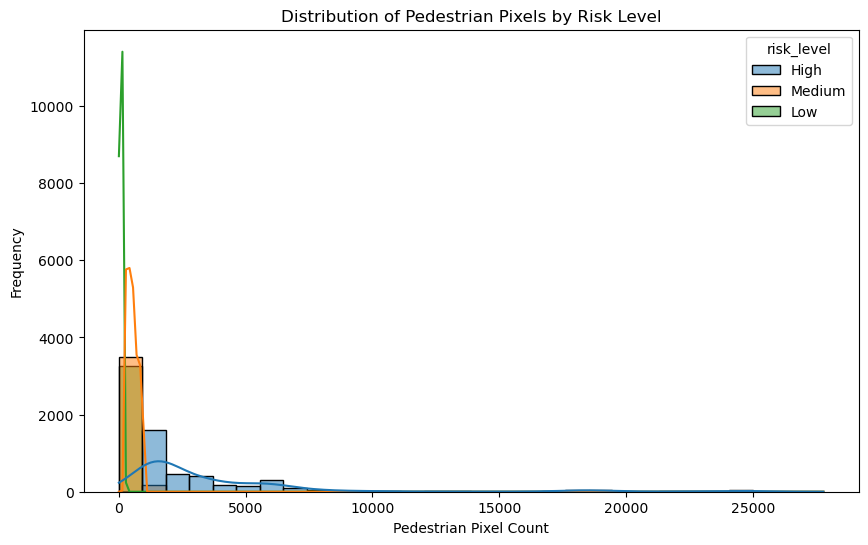

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x="pedestrian_pixels", hue="risk_level", bins=30, kde=True)
plt.xlabel("Pedestrian Pixel Count")
plt.ylabel("Frequency")
plt.title("Distribution of Pedestrian Pixels by Risk Level")
plt.show()

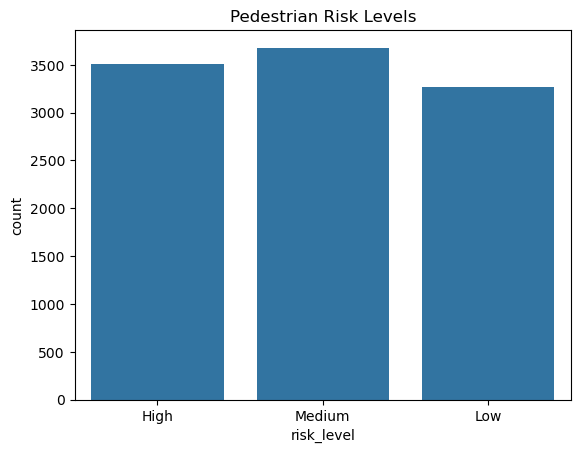

In [57]:
sns.countplot(data=df, x="risk_level")
plt.title("Pedestrian Risk Levels")
plt.show()
